In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import pickle
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

np.set_printoptions(linewidth=np.inf, suppress=True, precision=2)

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import tensorflow as tf

from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,ExpSineSquared, DotProduct,ConstantKernel)
from sklearn.gaussian_process import GaussianProcessRegressor  
from sklearn.svm import SVR

import mitosheet

In [3]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

pyo.init_notebook_mode(connected=True)

### Unstructured Variance, n_input = 12, n_output = 1

In [4]:
df = pd.read_excel("Data/US12I1O.xlsx", index_col = 0)
df

,Input 01,Input 02,Input 03,Input 04,Input 05,Input 06,Input 07,Input 08,Input 09,Input 10,Input 11,Input 12,Output 01
DMU 0001,288.81,493.46,202.31,356.18,384.45,653.77,129.40,100.28,38.45,306.59,92.41,250.91,250.77
DMU 0002,349.98,420.00,139.32,312.89,543.04,504.54,120.43,177.65,86.96,330.87,79.16,201.81,372.71
DMU 0003,280.78,452.42,127.85,315.42,559.22,466.35,166.57,165.57,81.43,359.75,83.23,246.78,293.40
DMU 0004,405.33,376.32,237.28,451.43,414.19,318.03,187.77,154.65,49.71,316.82,97.74,344.70,462.69
DMU 0005,348.96,426.79,170.01,292.91,502.76,342.94,146.53,165.78,63.80,329.79,76.17,355.61,374.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,206.54,333.40,274.01,424.09,465.99,548.04,143.02,58.25,49.65,355.16,85.54,238.49,279.23
DMU 0997,328.82,415.09,121.60,268.46,494.32,454.22,150.96,143.44,65.04,374.88,69.81,261.57,344.45
DMU 0998,310.52,565.44,126.06,320.91,463.01,390.07,151.81,202.55,101.67,333.12,87.52,328.13,320.62
DMU 0999,390.34,255.88,209.15,269.76,576.57,261.14,162.39,102.92,66.70,401.16,72.50,318.26,380.24


In [5]:
df_sol = pd.read_excel("US12I1O_gradientboostingregressor_Solution_3.xlsx", index_col=0)
df_sol

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Output 01
DMU 0001,0.428969,0.001307,0.0,0.000282,0.000282,0.000282,0.000282,0.000282,0.000282,0.000282,0.000000,0.000282,0.000282,0.001711
DMU 0002,0.613282,0.001188,0.0,0.000392,0.000392,0.000141,0.000392,0.000141,0.000141,0.000000,0.000000,0.000141,0.000392,0.001645
DMU 0003,0.528545,0.001647,0.0,0.000296,0.000296,0.000000,0.000609,0.000000,0.000296,0.000000,0.000000,0.000000,0.000296,0.001801
DMU 0004,0.734761,0.001506,0.0,0.000000,0.000000,0.000000,0.001225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001588
DMU 0005,0.635317,0.001534,0.0,0.000090,0.000445,0.000090,0.000551,0.000090,0.000090,0.000090,0.000035,0.000090,0.000090,0.001698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.531289,0.002007,0.0,0.000379,0.000379,0.000000,0.000379,0.000000,0.000379,0.000000,0.000000,0.000000,0.000379,0.001903
DMU 0997,0.599461,0.001257,0.0,0.000415,0.000415,0.000149,0.000415,0.000149,0.000149,0.000000,0.000000,0.000149,0.000415,0.001740
DMU 0998,0.565286,0.001541,0.0,0.000251,0.000251,0.000138,0.000551,0.000138,0.000138,0.000000,0.000000,0.000000,0.000251,0.001763
DMU 0999,0.668289,0.001535,0.0,0.000000,0.000000,0.000000,0.001535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001758


In [6]:
mitosheet.sheet(df_sol, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-8f4c3a31-7a4b-4249-8d18-a96a18c1a79a", "code": {"imports…

In [7]:
print((df_sol==0).sum())
print("Total : ", (df_sol==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01        0
Weight_Input 02      861
Weight_Input 03      126
Weight_Input 04       86
Weight_Input 05      239
Weight_Input 06        1
Weight_Input 07      278
Weight_Input 08      137
Weight_Input 09      425
Weight_Input 10      554
Weight_Input 11      307
Weight_Input 12      124
Weight_Output 01       0
dtype: int64
Total :  3138


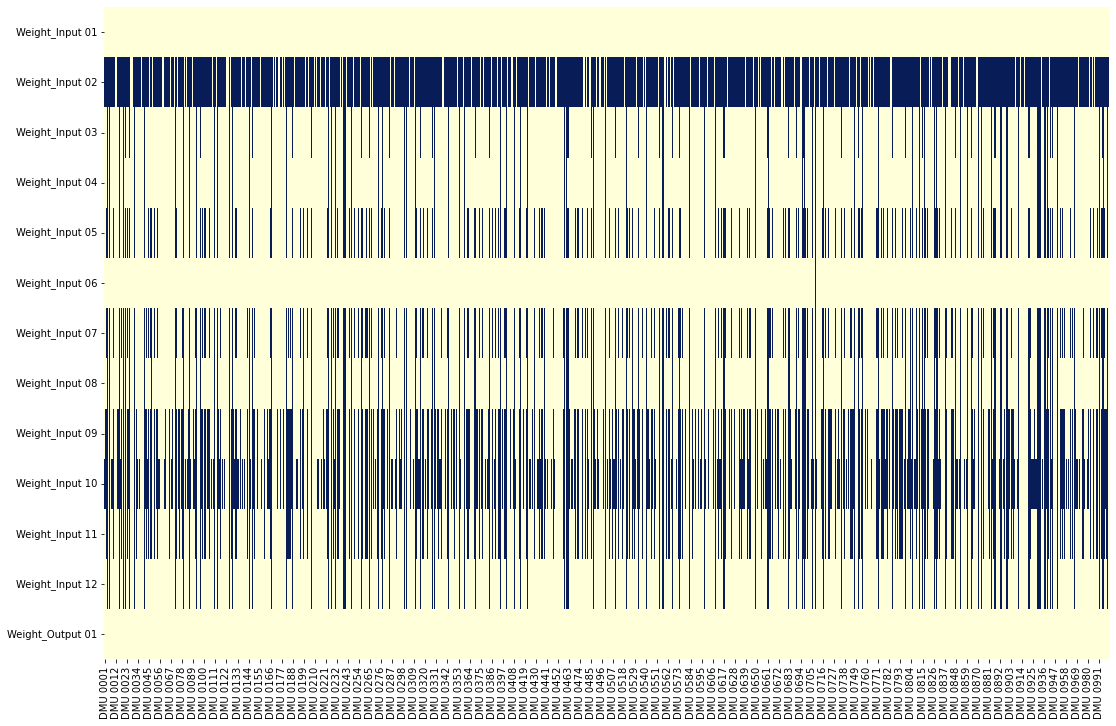

In [8]:
plt.figure(figsize=(18,12))
sns.heatmap(df_sol.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

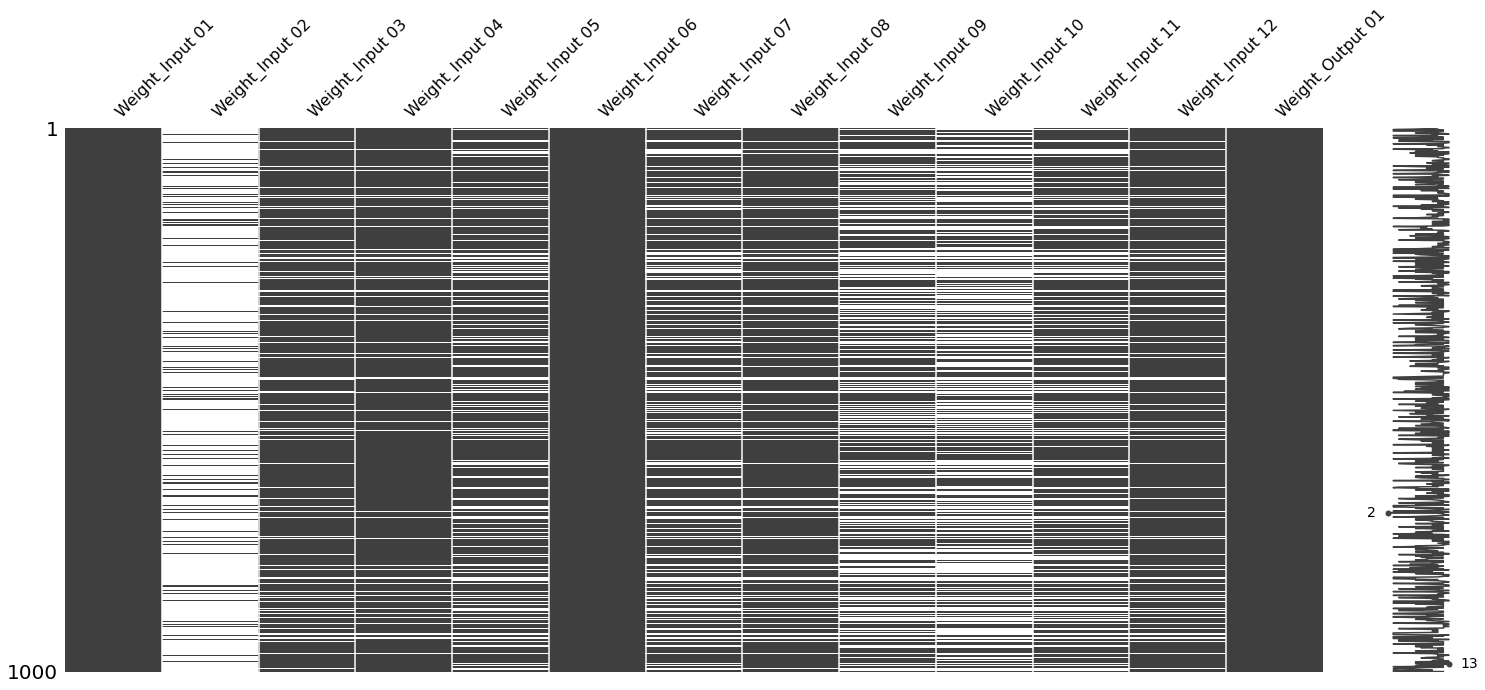

In [9]:
msno.matrix(df_sol.iloc[:,1:].replace(0, np.nan));

In [10]:
df_sol.iloc[:,1:].replace(0, np.nan).isna().sum(axis=1).describe()

count    1000.000000
mean        3.138000
std         3.086176
min         0.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        11.000000
dtype: float64

### DecisionTreeRegressor

In [11]:
df_dt = pd.read_excel("US12I1O_decisiontreeregressor_Solution_4.xlsx", index_col=0)
df_dt

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Output 01
DMU 0001,0.423473,0.001205,0.0,0.000223,0.000271,0.000271,0.000271,0.000271,0.000223,0.000271,0.000223,0.000271,0.000271,0.001689
DMU 0002,0.599338,0.000719,0.0,0.000300,0.000300,0.000300,0.000300,0.000300,0.000300,0.000300,0.000300,0.000300,0.000300,0.001608
DMU 0003,0.511744,0.001513,0.0,0.000081,0.000081,0.000081,0.000645,0.000081,0.000081,0.000081,0.000081,0.000081,0.000504,0.001744
DMU 0004,0.734761,0.001506,0.0,0.000000,0.000000,0.000000,0.001225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001588
DMU 0005,0.632635,0.001346,0.0,0.000163,0.000163,0.000163,0.000548,0.000163,0.000163,0.000163,0.000163,0.000163,0.000163,0.001691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.525265,0.001806,0.0,0.000000,0.000000,0.000000,0.000770,0.000000,0.000000,0.000711,0.000000,0.000000,0.000711,0.001881
DMU 0997,0.582905,0.001220,0.0,0.000195,0.000219,0.000195,0.000438,0.000219,0.000195,0.000219,0.000195,0.000219,0.000219,0.001692
DMU 0998,0.555442,0.001379,0.0,0.000167,0.000167,0.000167,0.000562,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.001732
DMU 0999,0.668289,0.001535,0.0,0.000000,0.000000,0.000000,0.001535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001758


In [12]:
print((df_dt==0).sum())
print("Total : ", (df_dt==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01        0
Weight_Input 02      841
Weight_Input 03      295
Weight_Input 04      131
Weight_Input 05      186
Weight_Input 06        1
Weight_Input 07      141
Weight_Input 08      235
Weight_Input 09      109
Weight_Input 10      214
Weight_Input 11      150
Weight_Input 12      106
Weight_Output 01       0
dtype: int64
Total :  2409


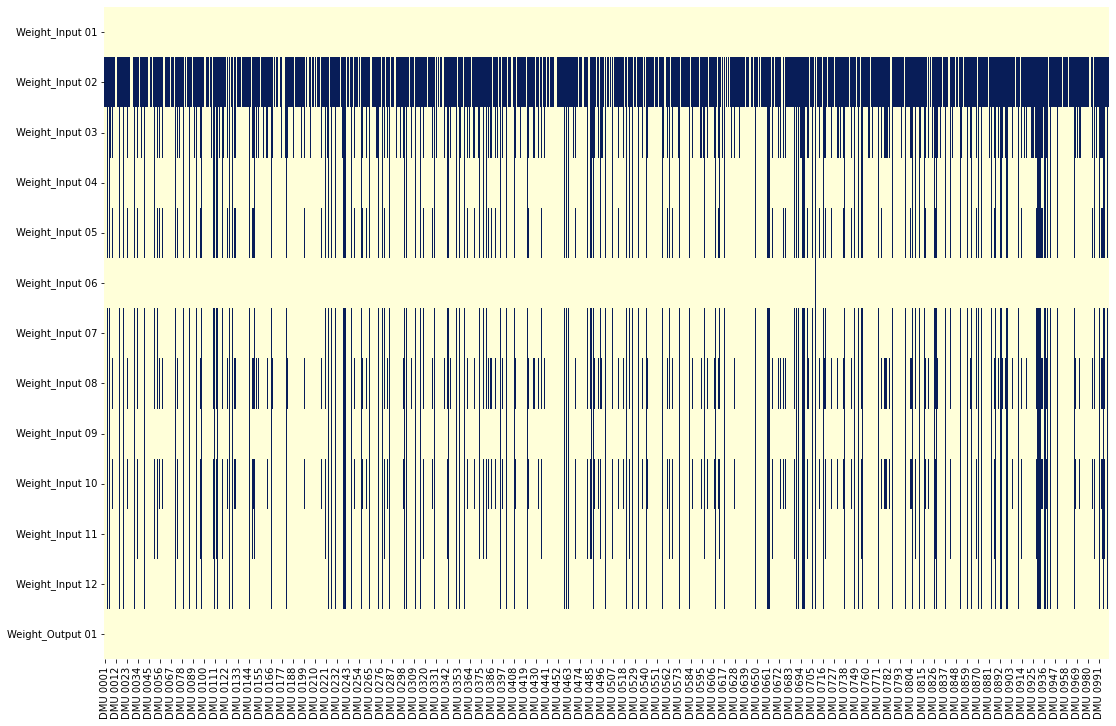

In [13]:
plt.figure(figsize=(18,12))
sns.heatmap(df_dt.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [14]:
res_dt = pd.DataFrame()
res_dt["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_dt["Efficiency_Scores_DT"] = df_dt["Efficiency_Scores"]
res_dt["Diff"] = res_dt["Efficiency_Scores_Basic"]  - res_dt["Efficiency_Scores_DT"]
res_dt["Diff_Perc"] = (res_dt["Diff"] / res_dt["Efficiency_Scores_Basic"]) * 100 
res_dt["Diff_Perc < 10"] = np.abs(res_dt["Diff_Perc"]) < 10  
res_dt = res_dt.round(4)
res_dt


,Efficiency_Scores_Basic,Efficiency_Scores_DT,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.4290,0.4235,0.0055,1.2813,True
DMU 0002,0.6133,0.5993,0.0139,2.2736,True
DMU 0003,0.5285,0.5117,0.0168,3.1786,True
DMU 0004,0.7348,0.7348,0.0000,0.0000,True
DMU 0005,0.6353,0.6326,0.0027,0.4222,True
...,...,...,...,...,...
DMU 0996,0.5313,0.5253,0.0060,1.1338,True
DMU 0997,0.5995,0.5829,0.0166,2.7618,True
DMU 0998,0.5653,0.5554,0.0098,1.7414,True
DMU 0999,0.6683,0.6683,0.0000,0.0000,True


In [15]:
mitosheet.sheet(res_dt, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-dce730e2-6a03-48b9-a816-16dc953bef0f", "code": {"imports…

In [16]:
blue = res_dt["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_dt["Diff_Perc < 10"]) - (res_dt["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  1000
red :  0


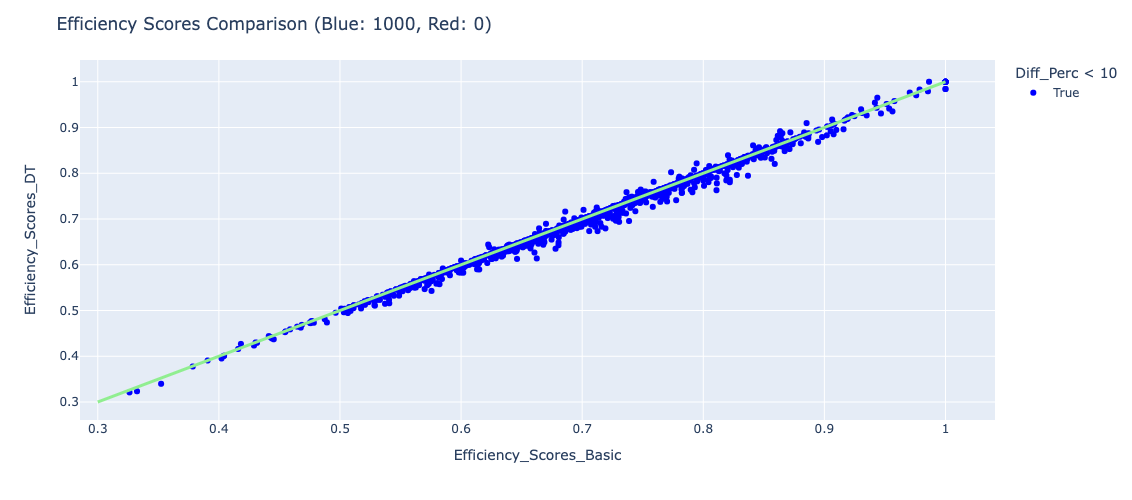

In [17]:
fig = px.scatter(res_dt, x="Efficiency_Scores_Basic", y="Efficiency_Scores_DT", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_DT", "Diff_Perc"] + [res_dt.index])


fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### RandomForestRegressor

In [18]:
df_rf = pd.read_excel("US12I1O_randomforestregressor_Solution_4.xlsx", index_col=0)
df_rf

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Output 01
DMU 0001,0.424925,0.001229,0.000000,0.000251,0.000315,0.000315,0.000315,0.000315,0.000000,0.000315,0.000000,0.000251,0.000315,0.001694
DMU 0002,0.614500,0.001069,0.000000,0.000309,0.000318,0.000309,0.000318,0.000318,0.000000,0.000318,0.000000,0.000309,0.000318,0.001649
DMU 0003,0.517561,0.001310,0.000000,0.000267,0.000356,0.000267,0.000389,0.000267,0.000000,0.000267,0.000000,0.000267,0.000267,0.001764
DMU 0004,0.734761,0.001506,0.000000,0.000000,0.000000,0.000000,0.001225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001588
DMU 0005,0.636938,0.001561,0.000000,0.000064,0.000400,0.000064,0.000617,0.000064,0.000000,0.000400,0.000064,0.000064,0.000064,0.001702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.517400,0.001595,0.000133,0.000133,0.000133,0.000133,0.000633,0.000133,0.000133,0.000133,0.000133,0.000133,0.000133,0.001853
DMU 0997,0.600758,0.001118,0.000000,0.000335,0.000335,0.000335,0.000335,0.000335,0.000000,0.000335,0.000000,0.000335,0.000335,0.001744
DMU 0998,0.564403,0.001521,0.000000,0.000182,0.000182,0.000182,0.000617,0.000182,0.000000,0.000182,0.000000,0.000182,0.000182,0.001760
DMU 0999,0.668289,0.001535,0.000000,0.000000,0.000000,0.000000,0.001535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001758


In [19]:
print((df_rf==0).sum())
print("Total : ", (df_rf==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01        0
Weight_Input 02      844
Weight_Input 03      205
Weight_Input 04       89
Weight_Input 05      183
Weight_Input 06        1
Weight_Input 07      154
Weight_Input 08      460
Weight_Input 09      125
Weight_Input 10      361
Weight_Input 11      191
Weight_Input 12      147
Weight_Output 01       0
dtype: int64
Total :  2760


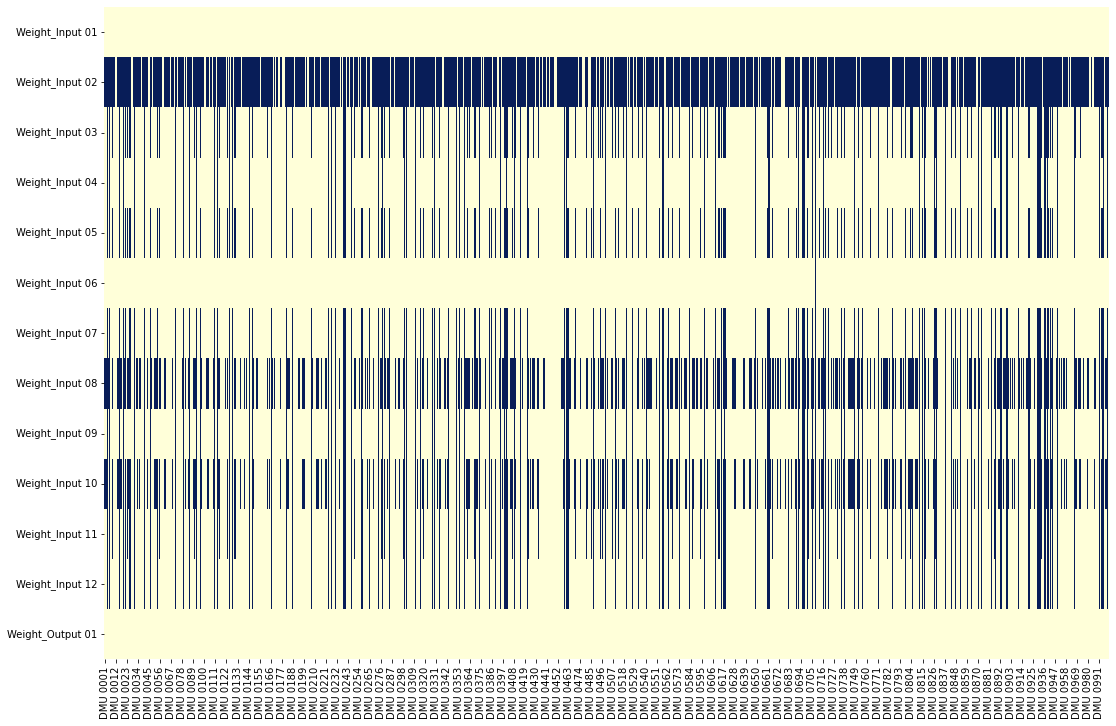

In [20]:
plt.figure(figsize=(18,12))
sns.heatmap(df_rf.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [21]:
res_rf = pd.DataFrame()
res_rf["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_rf["Efficiency_Scores_RF"] = df_rf["Efficiency_Scores"]
res_rf["Diff"] = res_rf["Efficiency_Scores_Basic"]  - res_rf["Efficiency_Scores_RF"]
res_rf["Diff_Perc"] = (res_rf["Diff"] / res_rf["Efficiency_Scores_Basic"]) * 100 
res_rf["Diff_Perc < 10"] = np.abs(res_rf["Diff_Perc"]) < 10  
res_rf = res_rf.round(4)
res_rf


,Efficiency_Scores_Basic,Efficiency_Scores_RF,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.4290,0.4249,0.0040,0.9426,True
DMU 0002,0.6133,0.6145,-0.0012,-0.1986,True
DMU 0003,0.5285,0.5176,0.0110,2.0781,True
DMU 0004,0.7348,0.7348,0.0000,0.0000,True
DMU 0005,0.6353,0.6369,-0.0016,-0.2551,True
...,...,...,...,...,...
DMU 0996,0.5313,0.5174,0.0139,2.6141,True
DMU 0997,0.5995,0.6008,-0.0013,-0.2165,True
DMU 0998,0.5653,0.5644,0.0009,0.1561,True
DMU 0999,0.6683,0.6683,0.0000,0.0000,True


In [22]:
mitosheet.sheet(res_rf, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-197786c4-189a-4c1d-872b-e5bc6b654400", "code": {"imports…

In [23]:
blue = res_rf["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_rf["Diff_Perc < 10"]) - (res_rf["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  1000
red :  0


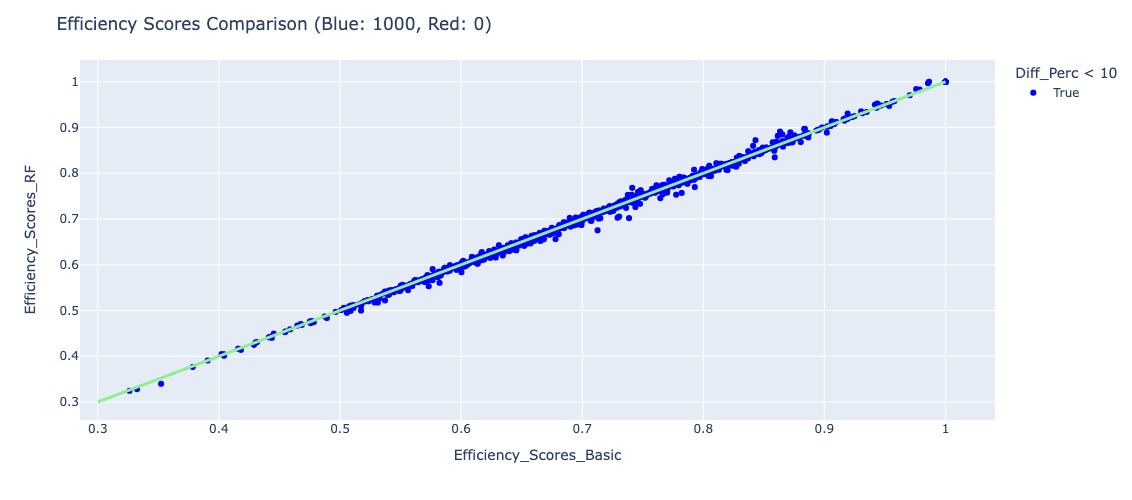

In [24]:
fig = px.scatter(res_rf, x="Efficiency_Scores_Basic", y="Efficiency_Scores_RF", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_RF", "Diff_Perc"] + [res_rf.index])


fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### GradientBoostingRegressor

In [25]:
df_gb = pd.read_excel("US12I1O_gradientboostingregressor_Solution_4.xlsx", index_col=0)
df_gb

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Output 01
DMU 0001,0.424925,0.001229,0.000000,0.000251,0.000315,0.000315,0.000315,0.000315,0.000000,0.000315,0.000000,0.000251,0.000315,0.001694
DMU 0002,0.614461,0.001057,0.000000,0.000317,0.000317,0.000317,0.000317,0.000317,0.000000,0.000317,0.000000,0.000317,0.000317,0.001649
DMU 0003,0.517561,0.001310,0.000000,0.000267,0.000356,0.000267,0.000389,0.000267,0.000000,0.000267,0.000000,0.000267,0.000267,0.001764
DMU 0004,0.734761,0.001506,0.000000,0.000000,0.000000,0.000000,0.001225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001588
DMU 0005,0.636671,0.001473,0.000000,0.000174,0.000183,0.000174,0.000596,0.000174,0.000000,0.000174,0.000000,0.000174,0.000174,0.001702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.517400,0.001595,0.000133,0.000133,0.000133,0.000133,0.000633,0.000133,0.000133,0.000133,0.000133,0.000133,0.000133,0.001853
DMU 0997,0.600758,0.001118,0.000000,0.000335,0.000335,0.000335,0.000335,0.000335,0.000000,0.000335,0.000000,0.000335,0.000335,0.001744
DMU 0998,0.564403,0.001521,0.000000,0.000182,0.000182,0.000182,0.000617,0.000182,0.000000,0.000182,0.000000,0.000182,0.000182,0.001760
DMU 0999,0.668289,0.001535,0.000000,0.000000,0.000000,0.000000,0.001535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001758


In [26]:
print((df_gb==0).sum())
print("Total : ", (df_gb==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01        0
Weight_Input 02      819
Weight_Input 03      187
Weight_Input 04       90
Weight_Input 05      157
Weight_Input 06        1
Weight_Input 07      162
Weight_Input 08      439
Weight_Input 09      148
Weight_Input 10      347
Weight_Input 11      169
Weight_Input 12      142
Weight_Output 01       0
dtype: int64
Total :  2661


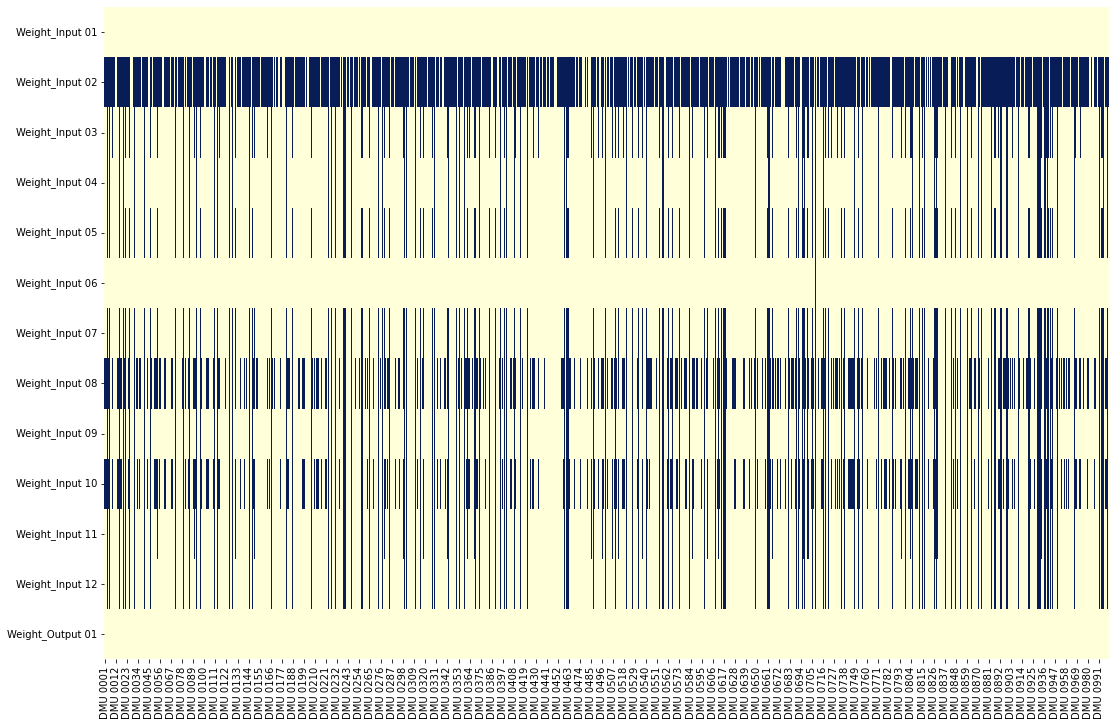

In [27]:
plt.figure(figsize=(18,12))
sns.heatmap(df_gb.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [28]:
res_gb = pd.DataFrame()
res_gb["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_gb["Efficiency_Scores_GB"] = df_gb["Efficiency_Scores"]
res_gb["Diff"] = res_gb["Efficiency_Scores_Basic"]  - res_gb["Efficiency_Scores_GB"]
res_gb["Diff_Perc"] = (res_gb["Diff"] / res_gb["Efficiency_Scores_Basic"]) * 100 
res_gb["Diff_Perc < 10"] = np.abs(res_gb["Diff_Perc"]) < 10  
res_gb = res_gb.round(4)
res_gb


,Efficiency_Scores_Basic,Efficiency_Scores_GB,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.4290,0.4249,0.0040,0.9426,True
DMU 0002,0.6133,0.6145,-0.0012,-0.1923,True
DMU 0003,0.5285,0.5176,0.0110,2.0781,True
DMU 0004,0.7348,0.7348,0.0000,0.0000,True
DMU 0005,0.6353,0.6367,-0.0014,-0.2130,True
...,...,...,...,...,...
DMU 0996,0.5313,0.5174,0.0139,2.6141,True
DMU 0997,0.5995,0.6008,-0.0013,-0.2165,True
DMU 0998,0.5653,0.5644,0.0009,0.1561,True
DMU 0999,0.6683,0.6683,0.0000,0.0000,True


In [29]:
mitosheet.sheet(res_gb, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-8eb480c1-03dc-452e-8d38-f5c8be53752d", "code": {"imports…

In [30]:
blue = res_gb["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_gb["Diff_Perc < 10"]) - (res_gb["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  1000
red :  0


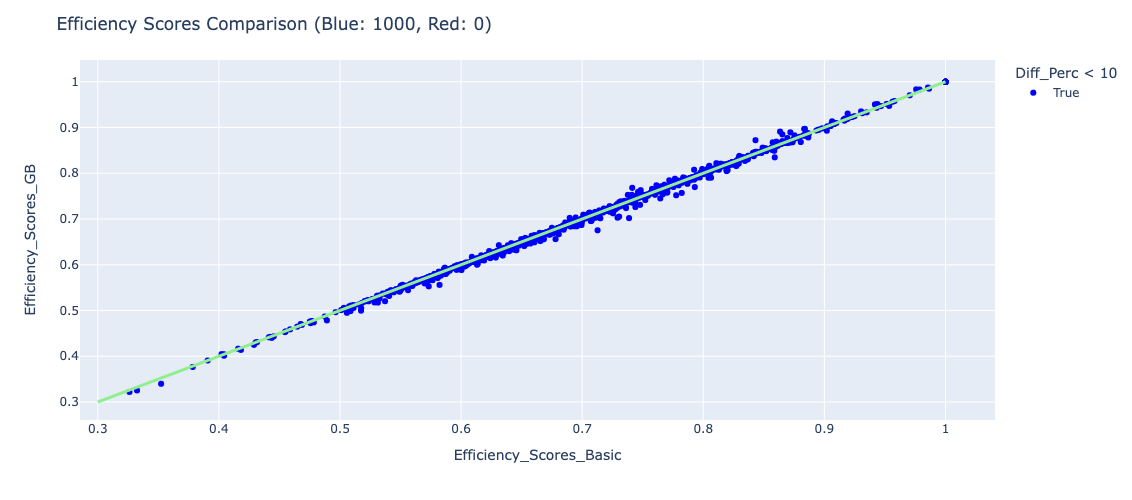

In [31]:
fig = px.scatter(res_gb, x="Efficiency_Scores_Basic", y="Efficiency_Scores_GB", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_GB", "Diff_Perc"] + [res_gb.index])


fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### XGBRegressor

In [32]:
df_xgb = pd.read_excel("US12I1O_xgbregressor_Solution_4.xlsx", index_col=0)
df_xgb

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Output 01
DMU 0001,0.408766,0.001323,0.000205,0.000205,0.000205,0.000205,0.000205,0.000205,0.000205,0.000205,0.000205,0.000205,0.000205,0.001630
DMU 0002,0.589513,0.001276,0.000000,0.000239,0.000239,0.000000,0.000504,0.000000,0.000239,0.000239,0.000239,0.000000,0.000239,0.001582
DMU 0003,0.516262,0.001502,0.000000,0.000229,0.000229,0.000000,0.000577,0.000000,0.000229,0.000384,0.000229,0.000000,0.000229,0.001760
DMU 0004,0.750043,0.001268,0.000000,0.000000,0.000000,0.000000,0.000856,0.000000,0.000363,0.000856,0.000363,0.000000,0.000000,0.001621
DMU 0005,0.633677,0.001616,0.000000,0.000000,0.000000,0.000000,0.001072,0.000000,0.000000,0.001072,0.000000,0.000000,0.000000,0.001694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.548106,0.002017,0.000063,0.000063,0.000063,0.000063,0.000665,0.000063,0.000665,0.000665,0.000063,0.000063,0.000063,0.001963
DMU 0997,0.578076,0.001432,0.000000,0.000218,0.000218,0.000000,0.000550,0.000000,0.000218,0.000366,0.000218,0.000000,0.000218,0.001678
DMU 0998,0.549454,0.001460,0.000000,0.000226,0.000226,0.000000,0.000584,0.000000,0.000226,0.000226,0.000226,0.000000,0.000226,0.001714
DMU 0999,0.676987,0.001324,0.000000,0.000000,0.000000,0.000000,0.001324,0.000000,0.000808,0.000808,0.000000,0.000000,0.000000,0.001780


In [33]:
print((df_xgb==0).sum())
print("Total : ", (df_xgb==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01        0
Weight_Input 02      545
Weight_Input 03      236
Weight_Input 04      194
Weight_Input 05      725
Weight_Input 06        1
Weight_Input 07      626
Weight_Input 08       53
Weight_Input 09       37
Weight_Input 10      126
Weight_Input 11      591
Weight_Input 12      152
Weight_Output 01       0
dtype: int64
Total :  3286


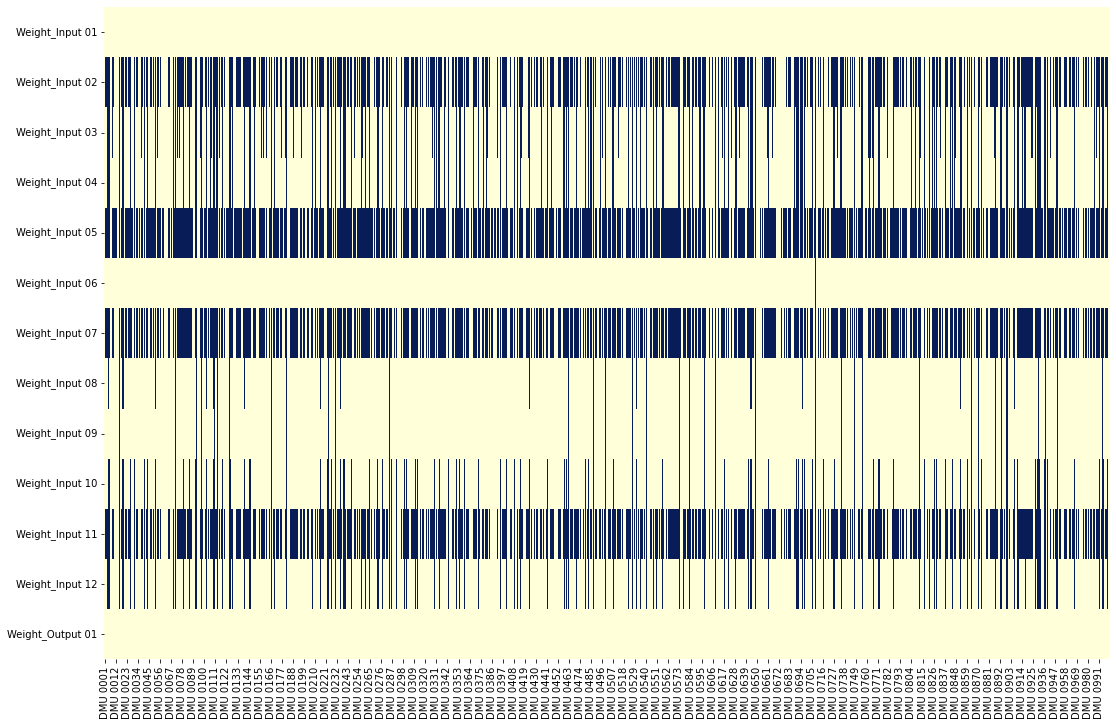

In [34]:
plt.figure(figsize=(18,12))
sns.heatmap(df_xgb.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [35]:
res_xgb = pd.DataFrame()
res_xgb["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_xgb["Efficiency_Scores_XGB"] = df_xgb["Efficiency_Scores"]
res_xgb["Diff"] = res_xgb["Efficiency_Scores_Basic"]  - res_xgb["Efficiency_Scores_XGB"]
res_xgb["Diff_Perc"] = (res_xgb["Diff"] / res_xgb["Efficiency_Scores_Basic"]) * 100 
res_xgb["Diff_Perc < 10"] = np.abs(res_xgb["Diff_Perc"]) < 10  
res_xgb = res_xgb.round(4)
res_xgb


,Efficiency_Scores_Basic,Efficiency_Scores_XGB,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,0.4290,0.4088,0.0202,4.7096,True
DMU 0002,0.6133,0.5895,0.0238,3.8757,True
DMU 0003,0.5285,0.5163,0.0123,2.3240,True
DMU 0004,0.7348,0.7500,-0.0153,-2.0798,True
DMU 0005,0.6353,0.6337,0.0016,0.2582,True
...,...,...,...,...,...
DMU 0996,0.5313,0.5481,-0.0168,-3.1653,True
DMU 0997,0.5995,0.5781,0.0214,3.5674,True
DMU 0998,0.5653,0.5495,0.0158,2.8008,True
DMU 0999,0.6683,0.6770,-0.0087,-1.3015,True


In [36]:
mitosheet.sheet(res_xgb, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-53f4ae24-3741-48ca-8acf-4c2c7b944600", "code": {"imports…

In [37]:
blue = res_xgb["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_xgb["Diff_Perc < 10"]) - (res_xgb["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  993
red :  7


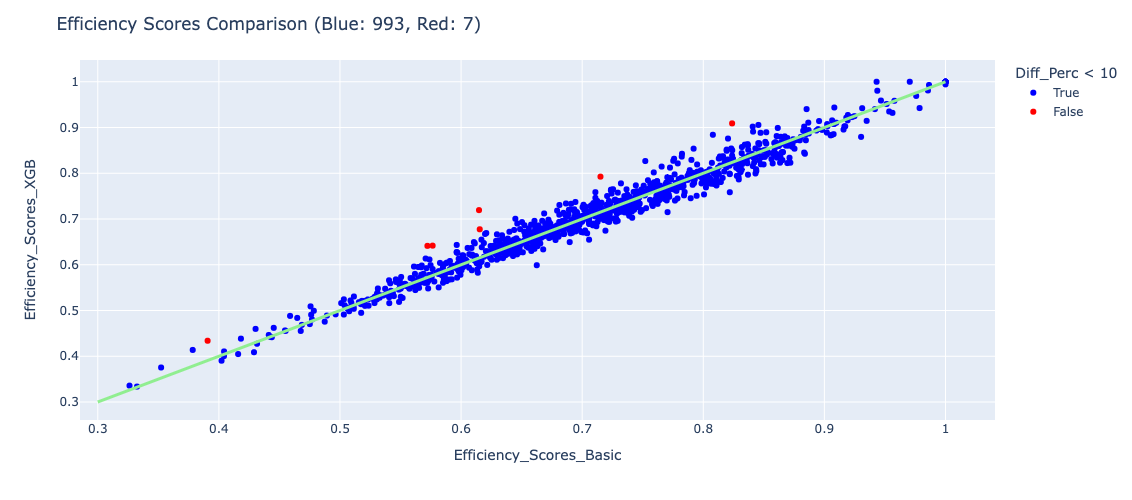

In [38]:
fig = px.scatter(res_xgb, x="Efficiency_Scores_Basic", y="Efficiency_Scores_XGB", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_XGB", "Diff_Perc"] + [res_xgb.index])


fig.add_traces(
    list(px.line(x = np.linspace(0.3, 1, num=2), y = np.linspace(0.3, 1, num=2)).select_traces())
)

fig.update_traces(line_color='lightgreen', line_width=3)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()